# Bellman Ford
 - **O( V^2 + E )**
 - **finds lowest-cost / shortest-path from A to B**

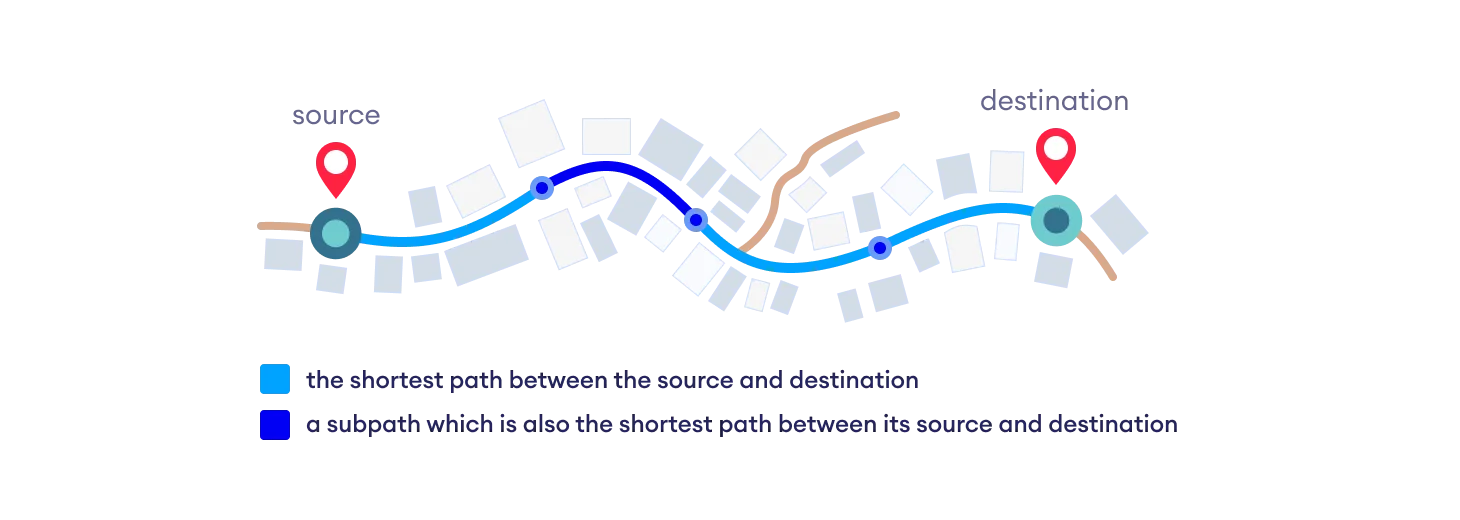

In [76]:
def bellman_ford(graph, source):
    # Step 1: Prepare the distance and predecessor for each node
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[source] = 0

    # Step 2: Relax the edges
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[neighbour] > distance[node] + graph[node][neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Step 3: Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."
            
   # Step 4: Making a df
    import numpy  as np
    import pandas as pd
    
    PATH, DIST, NODEs = [], [], graph.keys()
    for node in NODEs:
        stop = node
        path = [stop]
        dist = distance[node]
        while (stop != source) and predecessor[stop] in NODEs:
            stop = predecessor[stop]
            path.append(stop)
        path.reverse() 
        if path[0] == source: 
            PATH.append( path )
            DIST.append( dist )
        else: 
            PATH.append( np.nan )
            DIST.append( np.inf )
    
    df = pd.DataFrame()
    df['from'] = [source]*len(NODEs)
    df[ 'to' ] = NODEs
    df['path'] = PATH
    df['dist'] = DIST
    df.sort_values(['dist','to'],inplace=True)

    return df, distance, predecessor

graph = {
        'a': { 'b':-1, 'c':+4 },
        'b': { 'c':+3, 'd':+2, 'e':+2 },
        'c': { },
        'd': { 'b':+1, 'c':+5 },
        'e': { 'd':-3 }
    }


df, distance, predecessor = bellman_ford( graph, source='e')
df

,from,to,path,dist
3,e,d,"[e, d]",-3.0
1,e,b,"[e, d, b]",-2.0
4,e,e,[e],0.0
2,e,c,"[e, d, b, c]",1.0
0,e,a,NaN,inf


#####   

#####   